# Data Preparation, cleaning and initial data exploration

The goal is to identify potential data issues such as irrelevant features, post-approval leakage.

__Import libraries__

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)  # <- show all rows in notebook cell output

__Load  dataset__

In [2]:
# dataset_path = r"C:\Users\Bruger\OneDrive\Python\python-material\data\1-raw\lending-club-2007-2020Q3\Loan_status_2007-2020Q3-100ksample.csv"
# dataset_path = r"C:\Users\esbiry01\OneDrive - ANDRITZ AG\106 Python\python-material-20250213T135634Z-001\python-material\data\1-raw\lending-club-2007-2020Q3\Loan_status_2007-2020Q3-100ksample.csv"
# df = pd.read_csv('dataset_path.csv')
# df = pd.read_excel('dataset_path.xlsx')

dataset_path = r"C:\Users\esbiry01\OneDrive - ANDRITZ AG\106 Python\python-material-20250213T135634Z-001\python-material\data\1-raw\lending-club-2007-2020Q3\Loan_status_2007-2020Q3-100ksample.csv"
df = pd.read_csv(dataset_path, encoding="utf-8")
df.head(5) 

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,595422,15492,134798709,24000.0,24000.0,24000.0,60 months,11.05%,522.42,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,562657,90591,127097355,14000.0,14000.0,14000.0,60 months,13.59%,322.79,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


__Overview of dataset__

This part gives a first look at the dataset provided by Lending Club. The dataset consists of 100,000 loan application records with 143 columns. 

In [3]:
# 📊 Step 3: Overview of dataset
print("Shape:", df.shape)
df.info()

Shape: (100000, 143)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 143 entries, Unnamed: 0.1 to debt_settlement_flag
dtypes: float64(106), int64(3), object(34)
memory usage: 109.1+ MB


__Removing columns without business relevance__

The following columns are being dropped because they have no meaningful business or predictive value:


In [4]:
list_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'id']
df_dropped = df.drop(list_to_drop, axis = 1)

__Checking number of rows and columns after the columns were dropped__

In [5]:
print(f"df shape: {df.shape}")
print(f"df shape: {df_dropped.shape}")

df shape: (100000, 143)
df shape: (100000, 140)


__Identifying top and bottom columns by unique values across all types__

In [6]:
all_uniques = df_dropped.nunique().sort_values(ascending=False)

print(" Top 10 columns with most unique values:")
print(all_uniques.head(10))

print("\n Bottom 10 columns with fewest unique values:")
print(all_uniques.tail(10))  

 Top 10 columns with most unique values:
url                           100000
total_pymnt                    93762
total_pymnt_inv                91836
total_rec_int                  86806
tot_cur_bal                    81168
tot_hi_cred_lim                76897
total_bal_ex_mort              64944
last_pymnt_amnt                61178
total_il_high_credit_limit     55050
total_rec_prncp                44924
dtype: int64

 Bottom 10 columns with fewest unique values:
verification_status          3
num_tl_120dpd_2m             3
verification_status_joint    3
hardship_flag                2
initial_list_status          2
application_type             2
term                         2
debt_settlement_flag         2
pymnt_plan                   1
policy_code                  1
dtype: int64



__Identifying and dropping Low Variance Columns__

Columns like `pymnt_plan` and `policy_code` were found to have only a single unique value throughout the dataset. 

These features provide no predictive value for modeling, and can therefore be removed from the dataset.


In [7]:
# Detect low variance columns
low_variance = [col for col in df_dropped.columns if df_dropped[col].nunique() <= 1]
print("Low variance columns:", low_variance)

Low variance columns: ['pymnt_plan', 'policy_code']


In [8]:
# Drop low-variance columns in-place to maintain df_dropped
df_dropped = df_dropped.drop(columns=low_variance)

print("Dropped low-variance columns:", low_variance)

Dropped low-variance columns: ['pymnt_plan', 'policy_code']


In [9]:
# Checking number of rows and columns after the columns were dropped
print(f"df shape: {df.shape}")
print(f"df shape: {df_dropped.shape}")

df shape: (100000, 143)
df shape: (100000, 138)


__Identifying and dropping high-cardinality or low business relevance categorical features__


In [10]:
# Identify categorical columns with more than 50 unique values and show counts
high_cardinality = {
    col: df_dropped[col].nunique() 
    for col in df_dropped.select_dtypes(include='object').columns 
    if df_dropped[col].nunique() > 50
}
print("Categorical columns with more than 50 unique values:")
for col, count in high_cardinality.items():
    print(f"{col}: {count}")


Categorical columns with more than 50 unique values:
int_rate: 584
emp_title: 40094
issue_d: 159
url: 100000
title: 3455
zip_code: 878
addr_state: 51
earliest_cr_line: 667
revol_util: 1088
last_pymnt_d: 147
next_pymnt_d: 58
last_credit_pull_d: 137
sec_app_earliest_cr_line: 506


The following categorical columns are being removed due to the following reasons:

**url**: Unique for each row, no predictive value.

**zip_code**, **addr_state**: High cardinality, but unless aggregated or grouped, it introduces unnecessary complexity.

In [11]:
# Drop high-cardinality or low business relevance categorical features
high_cardinality_to_drop = ['url', 'zip_code', 'addr_state']
df_dropped.drop(columns=high_cardinality_to_drop, inplace=True)
print("Dropped columns:", high_cardinality_to_drop)


Dropped columns: ['url', 'zip_code', 'addr_state']


In [12]:
# Checking number of rows and columns after the columns were dropped
print(f"df shape: {df.shape}")
print(f"df shape: {df_dropped.shape}")

df shape: (100000, 143)
df shape: (100000, 135)


__Identifying and Dropping Post-Approval Features__

To avoid data leakage, we exclude columns that become available only after the loan is issued or payments start. These include columns with keywords like 'pymnt', 'recover', 'hardship', and 'settlement'. Retaining such features would bias the model, as they reflect information not available at the time of application.

In [13]:
# Flag likely post-approval / leaky columns
leaky_keywords = ['pymnt', 'recover', 'settlement', 'hardship', 'issue_d', 'funded', 'collection', 'chargeoff', 'int_rate', 'installment', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'payment_plan_start_date', 'orig_projected_additional_accrued_interest', 'disbursement_method', 'ferral_term']
leaky_cols = [col for col in df_dropped.columns if any(kw in col for kw in leaky_keywords)]
print("Potential post-approval (leaky) columns:", leaky_cols)

Potential post-approval (leaky) columns: ['funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'issue_d', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag']


In [14]:
# Use previously identified leaky_cols directly
post_approval_cols = leaky_cols
df_dropped.drop(columns=post_approval_cols, inplace=True)
print("Dropped post-approval columns:", post_approval_cols)


Dropped post-approval columns: ['funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'issue_d', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag']


In [15]:
# Checking number of rows and columns after the columns were dropped
print(f"df shape: {df.shape}")
print(f"df shape: {df_dropped.shape}")

df shape: (100000, 143)
df shape: (100000, 100)


__Identifying features with a high amount of missing values__

We conduct a missing value audit to identify columns with a high proportion of nulls. These features have missing values in over 80% of the records and are candidates for removal or imputation.

In [16]:
# Total number of rows in the dataset
total_rows = len(df_dropped)

# Calculate missing percentage for each column
missing_percentage = df_dropped.isnull().sum() / total_rows

# Filter columns with more than 80% missing values
high_missing = missing_percentage[missing_percentage > 0.80].sort_values(ascending=False)

# Display the result
print("Columns with more than 80% missing values:")
print(high_missing)



Columns with more than 80% missing values:
sec_app_revol_util           0.93387
verification_status_joint    0.93369
revol_bal_joint              0.93261
sec_app_fico_range_low       0.93260
sec_app_fico_range_high      0.93260
sec_app_earliest_cr_line     0.93260
sec_app_inq_last_6mths       0.93260
sec_app_mort_acc             0.93260
sec_app_open_acc             0.93260
sec_app_open_act_il          0.93260
sec_app_num_rev_accts        0.93260
annual_inc_joint             0.92834
dti_joint                    0.92834
mths_since_last_record       0.85370
dtype: float64


__Exploring columns with high cardinality and noise__


In [17]:
# Unique value counts for object columns
for col in df_dropped.select_dtypes(include='object').columns:
    print(f"{col}: {df_dropped[col].nunique()}")

term: 2
grade: 7
sub_grade: 35
emp_title: 40094
emp_length: 11
home_ownership: 6
verification_status: 3
loan_status: 10
purpose: 14
title: 3455
earliest_cr_line: 667
revol_util: 1088
initial_list_status: 2
last_credit_pull_d: 137
application_type: 2
verification_status_joint: 3
sec_app_earliest_cr_line: 506


__Cleaning and Reducing Dimensionality of emp_title__

The **emp_title** field contains over 40,000 unique entries, many of which are variations or near-duplicates (e.g., "Teacher", "teacher", "TEACHER", "Math teacher"). This level of cardinality is too high for effective modeling and would introduce significant noise if one-hot encoded or label encoded directly.

__Text Standardization__

Cleaning text data: making lower case and removing space

In [18]:
print("Number of unique titles:", df_dropped['emp_title'].value_counts().shape[0])
df_dropped['emp_title'].value_counts()[:10]

Number of unique titles: 40094


emp_title
Teacher             1709
Manager             1547
Owner                812
Registered Nurse     691
Driver               685
RN                   651
Supervisor           590
Sales                515
Office Manager       469
Project Manager      441
Name: count, dtype: int64

In [19]:
df_dropped['emp_title_clean'] = df_dropped['emp_title'].str.lower().str.strip()
df_dropped['emp_title_clean'].value_counts()[:10]

emp_title_clean
teacher             2121
manager             2062
owner               1245
registered nurse    1019
driver              1008
supervisor           978
sales                765
rn                   758
office manager       670
truck driver         612
Name: count, dtype: int64

In [20]:
print("Number of unique titles:", df_dropped['emp_title_clean'].value_counts().shape[0])

Number of unique titles: 33073


After standardizing the **emp_title** field by converting text to lowercase and removing leading/trailing spaces, the number of unique job titles decreased from **40,094 to 33,073**. 

__Mapping Job Titles to Job Families__

To reduce granularity and align with business logic, we used an external mapping file (emp_title_mapping.csv) to group similar job titles into broader job families (e.g., Finance, Operations). This step improves interpretability and supports consistent analysis across roles.


In [21]:
# ref_job_families = pd.read_csv(r"C:\Users\Bruger\OneDrive\Python\python-material\data\1-raw\emp_title_mapping.csv")
ref_job_families = pd.read_csv(r"C:\Users\esbiry01\OneDrive - ANDRITZ AG\106 Python\python-material-20250213T135634Z-001\python-material\data\1-raw\emp_title_mapping.csv")

print(f"Number of existing job families: {ref_job_families.Category.nunique()}")

print( len(ref_job_families["Job Title"].unique()))

ref_job_families.head()

Number of existing job families: 32
89


,Job Title,Category
0,web editor,Content/Media
1,route manager,Operations
2,quality manager,Quality Assurance
3,budget mgr,Finance
4,inspector,Quality Assurance


In [22]:
df_mapped = pd.merge(left = df_dropped
                     , right = ref_job_families
                     , left_on = "emp_title_clean"
                     , right_on= "Job Title"
                     , how = "left"
                    )

Quality check by counting number of records before and after join:

In [23]:
print(df_dropped.shape, df_mapped.shape)

(100000, 101) (102265, 103)


One of the reason why in the joint file there are more rows is that there are dublicates there

In [24]:
# Let's check if there are any duplicates in the reference file:
print(ref_job_families.shape)
print(ref_job_families.drop_duplicates().shape)

(91, 2)
(89, 2)


In [25]:
# The problem can be seen by grouping the ref data by job title and category, are shown rows where is more then 2:
row_count = ref_job_families.groupby(["Category", "Job Title"]).size().reset_index(name='count')
row_count[row_count['count'] > 1]

,Category,Job Title,count
17,Education,teacher,2
35,Healthcare,medical assistant,2


So, we need to drop the dublicates in the mapping file, and do join again and print shape to check the result

In [26]:
# Drop duplicates in the mapping file
ref_job_families_deduped = ref_job_families.drop_duplicates()

In [27]:
df_mapped_deduped = pd.merge(left = df_dropped
                     , right = ref_job_families_deduped
                     , left_on = "emp_title_clean"
                     , right_on= "Job Title"
                     , how = "left"  
                    )

In [28]:
print(df.shape, df_mapped_deduped.shape)

(100000, 143) (100000, 103)


__Checking number of mapped job titles__

In [29]:
mapped_count = df_mapped_deduped["Category"].notnull().sum()
unmapped_count = df_mapped_deduped["Category"].isnull().sum()

print(f" Mapped: {mapped_count}")
print(f" Unmapped: {unmapped_count}")


 Mapped: 13390
 Unmapped: 86610


__Dropping Job Title–Related Columns__

Only 13% of records were successfully mapped to job families using the reference file.
Due to this low coverage, we dropped job title related features to reduce noise and simplify the dataset.

In [30]:
# Drop the employee title-related columns only if they exist
cols_to_drop = ["emp_title", "emp_title_clean", "title"]
df_dropped = df_dropped.drop(columns=[col for col in cols_to_drop if col in df_dropped.columns])



In [31]:
# Checking number of rows and columns after the columns were dropped
print(df.shape, df_dropped.shape)

(100000, 143) (100000, 98)


In [32]:
df_dropped.select_dtypes(include='datetime').columns


Index([], dtype='object')

__Summary Statistics for remaining columns__

In this section, we generate a summary of descriptive statistics for all columns in the dataset, including both numeric and categorical variables. 

We use .describe(include='all') to get statistics for all data types (not just numeric).

Finally, we append a row with the data types of each column for quick inspection and interpretation.

This helps us better understand the structure and distribution of each feature.

In [33]:
# Show all columns
pd.set_option('display.max_columns', None)

# Get describe output (include all types)
desc = df_dropped.describe(include='all')

# Format numeric values to 2 decimals (skip non-numeric)
desc_formatted = desc.applymap(lambda x: '{0:.2f}'.format(x) if isinstance(x, (int, float)) else x)

# Append a final row with dtypes
desc_formatted.loc['dtype'] = df_dropped.dtypes.astype(str)

# Display final result
desc_formatted

C:\Users\esbiry01\AppData\Local\Temp\ipykernel_27300\2692670262.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  desc_formatted = desc.applymap(lambda x: '{0:.2f}'.format(x) if isinstance(x, (int, float)) else x)


,loan_amnt,term,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,last_credit_pull_d,last_fico_range_high,last_fico_range_low,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts
count,100000.00,100000,100000,100000,93050,100000,100000.00,100000,100000,100000,99898.00,100000.00,100000,100000.00,100000.00,100000.00,47186.00,14630.00,100000.00,100000.00,100000.00,99919,100000.00,100000,100000.00,100000.00,99998,100000.00,100000.00,24602.00,100000,7166.00,7166.00,6631,100000.00,97562.00,97562.00,70356.00,70356.00,70356.00,70356.00,68227.00,70356.00,60315.00,70356.00,70356.00,70356.00,70343.00,97562.00,70356.00,70356.00,70356.00,98222.00,97560.00,97152.00,97101.00,100000.00,94627.00,97562.00,97562.00,97562.00,98222.00,97212.00,21943.00,87190.00,31658.00,97562.00,97562.00,97562.00,97949.00,97562.00,97562.00,97562.00,97562.00,97562.00,97949.00,94488.00,97562.00,97562.00,97562.00,97558.00,97133.00,99955.00,99995.00,97562.00,98222.00,98222.00,97562.00,6739.00,6740.00,6740.00,6740,6740.00,6740.00,6740.00,6613.00,6740.00,6740.00
unique,nan,2.00,7.00,35.00,11.00,6.00,nan,3.00,10.00,14.00,nan,nan,667.00,nan,nan,nan,nan,nan,nan,nan,nan,1088.00,nan,2.00,nan,nan,137.00,nan,nan,nan,2.00,nan,nan,3.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,506.00,nan,nan,nan,nan,nan,nan
top,nan,36 months,B,B5,10+ years,MORTGAGE,nan,Source Verified,Fully Paid,debt_consolidation,nan,nan,Sep-2005,nan,nan,nan,nan,nan,nan,nan,nan,0%,nan,w,nan,nan,May-2020,nan,nan,nan,Individual,nan,nan,Not Verified,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Aug-2006,nan,nan,nan,nan,nan,nan
freq,nan,70384,29216,6225,32207,49149,nan,38932,51189,55647,nan,nan,712,nan,nan,nan,nan,nan,nan,nan,nan,638,nan,73302,nan,nan,53406,nan,nan,nan,92834,nan,nan,3350,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,64,nan,nan,nan,nan,nan,nan
mean,15332.37,nan,nan,nan,nan,nan,80029.18,nan,nan,nan,19.33,0.28,nan,700.64,704.64,0.55,35.03,74.95,11.69,0.18,16893.49,nan,24.04,nan,4032.02,4031.44,nan,690.48,677.66,44.63,nan,129576.41,19.41,nan,0.00,208.06,145926.39,0.93,2.84,0.70,1.62,20.32,36927.16,68.99,1.25,2.65,5999.96,56.15,36397.94,1.08,1.52,2.00,4.51

In [34]:
# Export to Excel
output_path = r'C:\Users\esbiry01\OneDrive - ANDRITZ AG\106 Python\Capstone project\Data\1-raw\descriptive_stats.xlsx'
desc_formatted.to_excel(output_path, index=True)


__Refining Data Types After Reviewing Descriptive Statistics__

After reviewing the descriptive statistics, I noticed that some columns are stored as object data types, even though they contain numeric information. To prepare the dataset for modeling and analysis, I'm **converting such columns into appropriate numeric types**.


In [35]:
# Convert 'term' column to numeric
df_dropped['term'] = df_dropped['term'].astype(str).str.extract(r'(\d+)').astype(float)

# Convert 'emp_length' column to numeric
df_dropped['emp_length'] = df_dropped['emp_length'].astype(str).str.extract(r'(\d+)').astype(float)

# Convert 'emp_length' column to numeric
df_dropped['revol_util'] = df_dropped['revol_util'].astype(str).str.extract(r'(\d+)').astype(float)


__Mapping the grade Column to Numeric Ordinal Values__

I mapped the grade values to numeric ordinal values, starting from 1 and dropped the sub_grade column to eliminate redundancy.

In [36]:
# Define grade order, starting from 1 instead of 0
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Map 'grade' to numeric values and create a new column 'grade_num'
df_dropped['grade_num'] = pd.Categorical(df_dropped['grade'], categories=grade_order, ordered=True).codes + 1

df_dropped = df_dropped.drop(columns=['sub_grade'])

# Check the first few rows to verify
df_dropped[['grade', 'grade_num']].head()



,grade,grade_num
0,B,2
1,B,2
2,B,2
3,B,2
4,C,3


__Checking Unique Values and Frequencies in the purpose Column__

I reviewed the purpose column to understand the distribution of loan purposes.

In [37]:
# Get the unique values and their counts in the 'purpose' column
purpose_counts = df_dropped['purpose'].value_counts()

# Display the unique categories and their frequencies
print(purpose_counts)


purpose
debt_consolidation    55647
credit_card           23954
home_improvement       6673
other                  6096
major_purchase         2223
medical                1177
small_business         1061
car                     987
house                   697
vacation                686
moving                  641
wedding                  87
renewable_energy         54
educational              17
Name: count, dtype: int64


__To simplify the analysis, we’ll group purpose categories to reduce dimensionality__

In [38]:
# Define categories to group
purpose_groups = {
    'Debt-related': ['debt_consolidation', 'credit_card'],
    'Home-related': ['home_improvement', 'house', 'vacation'],
    'Business and Education': ['small_business', 'educational', 'medical'],
    'Other': ['car', 'major_purchase', 'moving', 'wedding', 'renewable_energy']
}

# Group the less common categories under their respective group names
df_dropped['purpose'] = df_dropped['purpose'].replace({category: group for group, categories in purpose_groups.items() for category in categories})

# Ensure no duplication of 'Other' category
df_dropped['purpose'] = df_dropped['purpose'].replace('other', 'Other')

# Verify the changes
purpose_counts = df_dropped['purpose'].value_counts()
print(purpose_counts)


purpose
Debt-related              79601
Other                     10088
Home-related               8056
Business and Education     2255
Name: count, dtype: int64


__Feature Engineering - conversion into binary features__

To improve the model's performance, we convert both delinq_2yrs and inq_last_6mths into binary features since these features are very sparse.

In [39]:
# Replace 'delinq_2yrs' and 'inq_last_6mths' with binary values (1 for any delinquency/inquiries, 0 for none)
df_dropped['delinq_2yrs'] = df_dropped['delinq_2yrs'].apply(lambda x: 1 if x > 0 else 0)
df_dropped['inq_last_6mths'] = df_dropped['inq_last_6mths'].apply(lambda x: 1 if x > 0 else 0)

# Verify the changes
print(df_dropped[['delinq_2yrs', 'inq_last_6mths']].head())


   delinq_2yrs  inq_last_6mths
0            1               0
1            0               0
2            0               0
3            0               0
4            0               1


__Converting to DateTime__

The earliest_cr_line column contains credit line dates in object format. To make this feature usable for time-related analysis, we will convert it to a datetime format.

In [40]:
# If the column names are correct, convert them
df_dropped['earliest_cr_line'] = pd.to_datetime(df_dropped['earliest_cr_line'], format='%b-%Y')
df_dropped['last_credit_pull_d'] = pd.to_datetime(df_dropped['last_credit_pull_d'], format='%b-%Y')
df_dropped['sec_app_earliest_cr_line'] = pd.to_datetime(df_dropped['sec_app_earliest_cr_line'], format='%b-%Y')

__Filling missing values with 0 to indicate the absence of a particular condition.__

In [41]:
# Fill missing values in both columns with 0 and assign back to the columns
df_dropped['mths_since_last_delinq'] = df_dropped['mths_since_last_delinq'].fillna(0)
df_dropped['mths_since_last_record'] = df_dropped['mths_since_last_record'].fillna(0)
df_dropped['revol_util'] = df_dropped['revol_util'].fillna(0)

# Verify the changes
print(df_dropped[['mths_since_last_delinq', 'mths_since_last_record', 'revol_util']].head())


   mths_since_last_delinq  mths_since_last_record  revol_util
0                    19.0                   110.0        82.0
1                     0.0                     0.0        64.0
2                     0.0                    61.0        52.0
3                     0.0                     0.0        12.0
4                     0.0                     0.0        27.0


__Missing Values Analysis__

We calculate the count and percentage of missing values for each column in the dataset. The columns are sorted by the number of missing values in descending order. This helps identify columns with high missing data, which can be considered for imputation or removal.


In [42]:
# Calculate the number of missing values for each column
missing_values = df_dropped.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

# Combine both the count and percentage into a DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Sort by 'Missing Values' in descending order
missing_data_sorted = missing_data.sort_values(by='Missing Values', ascending=False)

# Display the columns with missing values
print(missing_data_sorted[missing_data_sorted['Missing Values'] > 0])


                                Missing Values  Percentage
sec_app_revol_util                       93387      93.387
verification_status_joint                93369      93.369
revol_bal_joint                          93261      93.261
sec_app_fico_range_low                   93260      93.260
sec_app_num_rev_accts                    93260      93.260
sec_app_open_act_il                      93260      93.260
sec_app_open_acc                         93260      93.260
sec_app_mort_acc                         93260      93.260
sec_app_inq_last_6mths                   93260      93.260
sec_app_earliest_cr_line                 93260      93.260
sec_app_fico_range_high                  93260      93.260
annual_inc_joint                         92834      92.834
dti_joint                                92834      92.834
mths_since_recent_bc_dlq                 78057      78.057
mths_since_last_major_derog              75398      75.398
mths_since_recent_revol_delinq           68342      68.3

__Dropping Columns with High Missing Values__

This code calculates missing values for each column, identifies columns with more than 50% of missing data, and drops them from the DataFrame. 

In [43]:
# Calculate the number of missing values for each column
missing_values = df_dropped.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df_dropped)) * 100

# Combine both the count and percentage into a DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Sort by 'Missing Values' in descending order
missing_data_sorted = missing_data.sort_values(by='Missing Values', ascending=False)

# Set the threshold for dropping columns (e.g., 50% missing values)
threshold = 50

# Separate the columns that have more missing values than the threshold
columns_to_drop = missing_data_sorted[missing_data_sorted['Percentage'] > threshold]

# Save the columns that will be dropped
dropped_columns = columns_to_drop.index.tolist()

# Display the dropped columns
print(f"Columns dropped (more than {threshold}% missing values):")
print(dropped_columns)

# Drop these columns from the DataFrame
df_dropped = df_dropped.drop(columns=dropped_columns)

# Print the number of remaining columns
print(f"Number of columns remaining: {len(df_dropped.columns)}")



Columns dropped (more than 50% missing values):
['sec_app_revol_util', 'verification_status_joint', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_num_rev_accts', 'sec_app_open_act_il', 'sec_app_open_acc', 'sec_app_mort_acc', 'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'annual_inc_joint', 'dti_joint', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_recent_revol_delinq']
Number of columns remaining: 82


__Imputing Missing Values Based on Distribution__

In this process, we identify columns with missing values and classify them based on their distribution:

Normal Distribution: Columns with a skewness between -1 and 1 and kurtosis between 0 and 3 are considered normally distributed. Missing values in these columns are imputed with the mean.

Non-Normal Distribution: Columns not meeting the normal distribution criteria are considered non-normal. Missing values in these columns are imputed with the median.


In [44]:
import numpy as np
from scipy.stats import skew, kurtosis

# Example dataset: df_dropped (replace with your actual DataFrame)

# List to store column names for imputations
normal_dist_columns = []
non_normal_dist_columns = []

# Filter out numeric columns (exclude datetime columns)
numeric_columns = df_dropped.select_dtypes(include=[np.number]).columns.tolist()

# Iterate through each numeric column with missing values
for column in numeric_columns:
    if df_dropped[column].isnull().any():  # Check if column has missing values
        skew_val = df_dropped[column].skew()
        kurt_val = df_dropped[column].kurtosis()

        # Criteria for normal distribution
        if abs(skew_val) < 1 and abs(kurt_val) < 3:
            normal_dist_columns.append(column)
        else:
            non_normal_dist_columns.append(column)

# Impute normal distributed columns with the mean
for column in normal_dist_columns:
    mean_value = df_dropped[column].mean()
    df_dropped[column] = df_dropped[column].fillna(mean_value)

# Impute non-normal distributed columns with the median
for column in non_normal_dist_columns:
    median_value = df_dropped[column].median()
    df_dropped[column] = df_dropped[column].fillna(median_value)

# Print the columns and the imputation method
print("Normal Distributed Columns Imputed with Mean:")
print(normal_dist_columns)
print("\nNon-Normal Distributed Columns Imputed with Median:")
print(non_normal_dist_columns)

# Optional: Display the DataFrame with imputed values
# print(df_dropped)

# Save the updated dataframe if needed
# df_dropped.to_csv('path_to_save.csv', index=False)


Normal Distributed Columns Imputed with Mean:
['emp_length', 'il_util', 'all_util', 'bc_util', 'mo_sin_old_il_acct', 'mths_since_recent_inq', 'percent_bc_gt_75']

Non-Normal Distributed Columns Imputed with Median:
['dti', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_cre

__One-Hot Encoding of Object Columns (Excluding Target Columns)__

In this step, we perform one-hot encoding on the categorical object columns (`'home_ownership'`, `'verification_status'`, `'purpose'`, `'initial_list_status'`, and `'application_type'`), excluding the target columns (`'grade'` and `'loan_status'`). This transformation converts categorical values into binary columns, which are essential for machine learning algorithms that require numeric input.


In [45]:
# Select columns with 'object' data type
object_columns = df_dropped.select_dtypes(include=['object']).columns

# Display the object columns
print("Object columns in the dataset:")
print(object_columns)



Object columns in the dataset:
Index(['grade', 'home_ownership', 'verification_status', 'loan_status',
       'purpose', 'initial_list_status', 'application_type'],
      dtype='object')


In [46]:
# List of columns to display (excluding 'grade' and 'loan_status')
columns_to_display = ['home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']

# Display unique values for each of the columns
for col in columns_to_display:
    print(f"Unique values in column '{col}':")
    print(df_dropped[col].unique())
    print("\n")


Unique values in column 'home_ownership':
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'OTHER' 'NONE']


Unique values in column 'verification_status':
['Source Verified' 'Not Verified' 'Verified']


Unique values in column 'purpose':
['Home-related' 'Debt-related' 'Other' 'Business and Education']


Unique values in column 'initial_list_status':
['w' 'f']


Unique values in column 'application_type':
['Individual' 'Joint App']




In [47]:
# Checking number of rows and columns after the columns were dropped
print(f"df shape: {df.shape}")
print(f"df shape: {df_dropped.shape}")

df shape: (100000, 143)
df shape: (100000, 82)


In [48]:
# List of columns to encode (excluding 'grade' and 'loan_status')
columns_to_encode = ['home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']

# Perform one-hot encoding on the selected columns
df_encoded = pd.get_dummies(df_dropped, columns=columns_to_encode, drop_first=True)


In [49]:
# Checking number of rows and columns after the columns were dropped
print(f"df shape: {df_dropped.shape}")
print(f"df shape: {df_encoded.shape}")

df shape: (100000, 82)
df shape: (100000, 89)


__Checking for duplicate rows__

In [50]:
# Checking for duplicate rows
duplicates = df_encoded.duplicated().sum()
duplicates

0

__Creating a new feature: debt-to-income ratio__

In [51]:
# Creating a new feature: debt-to-income ratio
df_encoded['debt_to_income'] = df_encoded['loan_amnt'] / df_encoded['annual_inc']
df_encoded['loan_default'] = df_encoded.loan_status == "Charged Off"
df_encoded[['loan_amnt', 'annual_inc', 'debt_to_income','loan_default']].head(5)


,loan_amnt,annual_inc,debt_to_income,loan_default
0,4000.0,48000.0,0.083333,False
1,24000.0,57000.0,0.421053,False
2,5000.0,55000.0,0.090909,False
3,24000.0,43500.0,0.551724,False
4,14000.0,48000.0,0.291667,False


In [52]:
def check_infinity(df_encoded):
    infinite_list = df.isin([-np.inf, np.inf]).sum()

    if infinite_list.sum() == 0:
        print("No column has infinite values")
    else:
        print("Columns with infinite values:")
        print(infinite_list[infinite_list>0])

check_infinity(df_encoded)

No column has infinite values


In [53]:
# Display relevant columns after verifying column names
df_encoded[['loan_amnt', 'annual_inc', 'debt_to_income', 'dti']].head(5)


,loan_amnt,annual_inc,debt_to_income,dti
0,4000.0,48000.0,0.083333,20.25
1,24000.0,57000.0,0.421053,25.33
2,5000.0,55000.0,0.090909,7.22
3,24000.0,43500.0,0.551724,24.55
4,14000.0,48000.0,0.291667,24.30


__Analysis of correlations__

In [54]:
# Check correlation with known target columns 

df_corr = df_encoded.copy()
target = "loan_default"
if target in df_corr.columns:
    corr_with_target = df_corr.corr(numeric_only=True)[target].sort_values(ascending=False)
    print(corr_with_target)
else:
    print(f"'{target}' is not available.")


loan_default                           1.000000
grade_num                              0.237012
acc_open_past_24mths                   0.093389
verification_status_Verified           0.090607
num_tl_op_past_12m                     0.080497
term                                   0.078286
percent_bc_gt_75                       0.070900
bc_util                                0.069665
inq_last_6mths                         0.063932
revol_util                             0.060248
open_rv_24m                            0.056967
home_ownership_RENT                    0.052717
open_acc_6m                            0.050393
num_actv_rev_tl                        0.047498
open_rv_12m                            0.046656
all_util                               0.045457
num_rev_tl_bal_gt_0                    0.044308
pub_rec                                0.041858
mths_since_last_record                 0.038639
il_util                                0.036564
pub_rec_bankruptcies                   0

### Key Observations:

#### Strong Positive Correlations:

- `grade_num` has the highest positive correlation with `loan_default` (0.237), meaning that this feature is significantly related to whether a loan defaults.

- Other moderately correlated features include `acc_open_past_24mths`, `verification_status_Verified`, `num_tl_op_past_12m`, `term`, and `percent_bc_gt_75`. These features suggest that the number of accounts, verification status, number of recent inquiries, term, and credit usage are factors associated with loan default.

#### Strong Negative Correlations:

- Features like `last_fico_range_low` and `last_fico_range_high` have a significant negative correlation with `loan_default` (around -0.55 to -0.60). This suggests that higher FICO scores are associated with a lower likelihood of loan default.

- Other negatively correlated features include `out_prncp_inv`, `out_prncp`, and `fico_range_high`, indicating that factors like loan principal payments and FICO scores are inversely related to default.


__Heatmap__

In [55]:
# Select numeric columns only
df_numeric = df_encoded.select_dtypes(include="number")


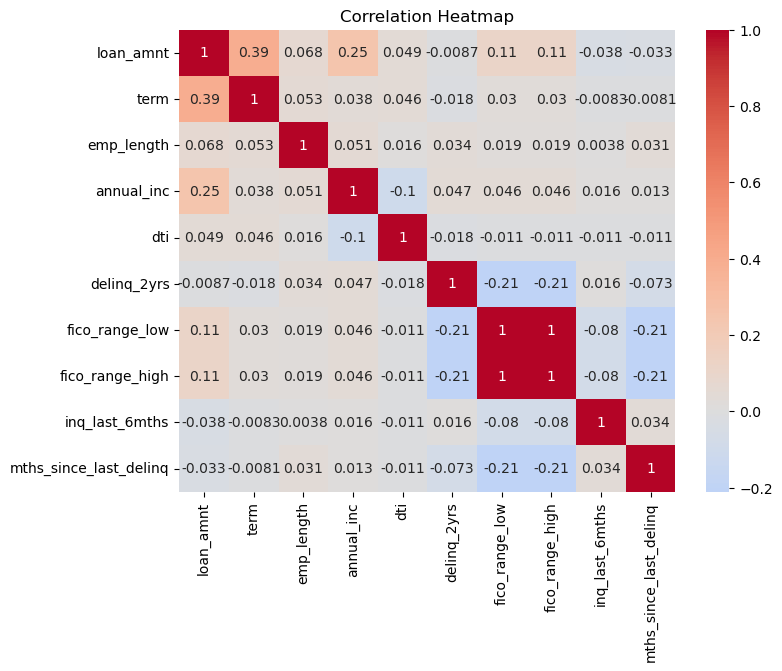

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric \
            .drop(columns=df_numeric.columns[10:]) \
            .corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

__Top 3 correlations for each numarical feature__

In [57]:

df_to_iterate = df_numeric.corr()
    
# Iterate through each numeric column in the dataframe
for column in df_to_iterate.columns:
    # Sort the values in descending order and take the top 3
    top_3_values = df_to_iterate[column].nlargest(3)
    print(f"Top 3 values for column '{column}':\n{top_3_values}\n")

Top 3 values for column 'loan_amnt':
loan_amnt        1.000000
out_prncp_inv    0.449634
out_prncp        0.449608
Name: loan_amnt, dtype: float64

Top 3 values for column 'term':
term         1.000000
loan_amnt    0.390571
grade_num    0.341979
Name: term, dtype: float64

Top 3 values for column 'emp_length':
emp_length              1.000000
mo_sin_old_rev_tl_op    0.189046
mort_acc                0.179369
Name: emp_length, dtype: float64

Top 3 values for column 'annual_inc':
annual_inc         1.000000
tot_hi_cred_lim    0.347566
tot_cur_bal        0.327690
Name: annual_inc, dtype: float64

Top 3 values for column 'dti':
dti                           1.000000
total_il_high_credit_limit    0.191796
total_bal_ex_mort             0.170342
Name: dti, dtype: float64

Top 3 values for column 'delinq_2yrs':
delinq_2yrs              1.000000
num_tl_90g_dpd_24m       0.352747
num_accts_ever_120_pd    0.141344
Name: delinq_2yrs, dtype: float64

Top 3 values for column 'fico_range_low':
fico_r

__Check correlation of highly correlated features with  target__

In [58]:
# Specify the columns of interest
columns_of_interest = ['open_acc', 'num_sats']

# Check if the target exists in the dataframe
target = "loan_default"
if target in df_encoded.columns:
    # Calculate correlation only for the selected columns
    corr_with_target = df_encoded[columns_of_interest + [target]].corr(numeric_only=True)[target].sort_values(ascending=False)
    print(corr_with_target)
else:
    print(f"'{target}' is not available.")



loan_default    1.000000
num_sats        0.008089
open_acc        0.008073
Name: loan_default, dtype: float64


__Dropping highly correlated features with weak target correlation__

From the analysis of correlations, we observed the following:

Features open_acc, num_sats, and num_op_rev_tl are highly correlated with each other.

However, all three features have weak positive correlations with the target variable (loan_default).

Approach:

In [59]:
print(f"df shape: {df_encoded.shape}")

df shape: (100000, 91)


In [60]:
# Define the columns that are highly correlated but weakly correlated to the target
columns_to_drop = ['num_sats', 'open_acc']  # Choosing to drop 'num_sats' or 'open_acc'

# Drop these columns from the dataframe
df_encoded.drop(columns=columns_to_drop, inplace=True)

# Check the number of rows and columns after the columns were dropped
print(f"df shape: {df_encoded.shape}")


df shape: (100000, 89)


In [62]:
df_encoded.to_csv(r'C:\Users\esbiry01\OneDrive - ANDRITZ AG\106 Python\Capstone project\Data\2-intermediate\df_out_2.csv', index=False)
